In [1]:
import requests
import json
from pandas.io.json import json_normalize
import pandas as pd
# https://open-data-ls-osp-sdg.hub.arcgis.com/datasets/45b76303953d40e2996a3da255bf8fe8_0?geometry=2.955%2C52.877%2C44.769%2C57.274

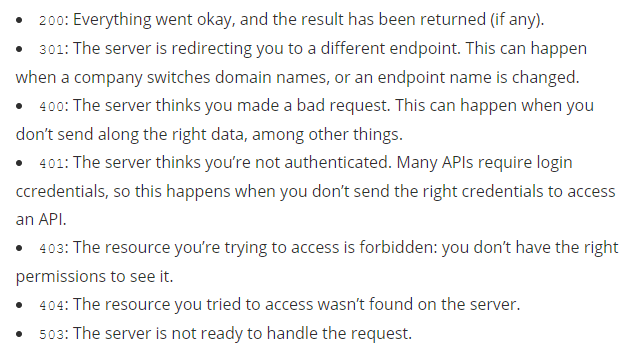

In [25]:
# r = requests.get("https://opendata.arcgis.com/datasets/3df1e86f5235498ab7cf9cec615a7fd7_0.geojson")
r = requests.get("https://opendata.arcgis.com/datasets/45b76303953d40e2996a3da255bf8fe8_0.geojson")
# https://open-data-ls-osp-sdg.hub.arcgis.com/datasets/3df1e86f5235498ab7cf9cec615a7fd7_0/data?geometry=5.592%2C52.877%2C42.132%2C57.274&orderBy=date
print("Request status: ", r.status_code)

Request status:  200


In [28]:
%%time
# data = json.loads(r.text) # old and slow version
data = r.json()

Wall time: 163 ms


In [29]:
df = pd.json_normalize(data, 'features')

for i in df.columns:
    if 'properties' in i:
        df = df.rename({str(i) : str(i[11:])}, axis = 1) 
    elif 'attributes' in i:
        df = df.rename({str(i) : str(i[11:])}, axis = 1) 
    elif 'geometry' in i:
        df = df.rename({str(i) : str(i[9:])}, axis = 1) 
    else:
        continue

In [30]:
df.drop(columns = ['type', '', 'municipality_code', 'municipality_name', 'coordinates', 'object_id'], inplace = True)

df['date'] = df['date'].astype('datetime64[ns]')
df = df.rename({'date': 'Data'}, axis = 1) 

df['Savaitė'] = df['Data'].dt.week
df['Metai'] = df['Data'].dt.year
# df['Mėnuo'] = df['Data'].dt.month
# df['Dieėnna'] = df['Data'].dt.day

df = df.groupby(['Metai', 'Savaitė']).sum()

df.reset_index(inplace = True)
# df.sort_values(by = 'Data', inplace = True)

covid_19_df = df.copy()
covid_19_df.tail(5)

,Metai,Savaitė,active_cases,confirmed_cases,recovered_cases,deaths,other_deaths,confirmed_cases_cumulative,recovered_cases_cumulative,deaths_cumulative,other_deaths_cumulative
42,2020,47,194230,12324,5725,107,49,298734,101035,2473,996
43,2020,48,243883,13122,5837,109,74,390625,142069,3208,1465
44,2020,49,283638,14719,8614,137,91,486921,197090,4097,2096
45,2020,50,344255,18977,8329,188,77,607218,255019,5307,2637
46,2020,51,53501,1432,2591,38,20,96452,41665,863,423
